In [1]:
import qiskit

In [2]:
qiskit.__version__

'1.3.0'

In [10]:
import numpy as np


ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

print(ket0 / 2 + ket1 / 2)

M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2


[[0.5]
 [0.5]]


In [8]:
from qiskit.visualization import array_to_latex

display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [31]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

In [32]:
display(v.draw("text"))
display(v.draw("latex"))
print(v.draw("latex_source"))

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

<IPython.core.display.Latex object>

(\frac{1}{3} + \frac{2 i}{3}) |0\rangle- \frac{2}{3} |1\rangle


In [33]:
display(v.draw("latex"))

<IPython.core.display.Latex object>

In [40]:
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

Measured: 1
Post-measurement state:


<IPython.core.display.Latex object>

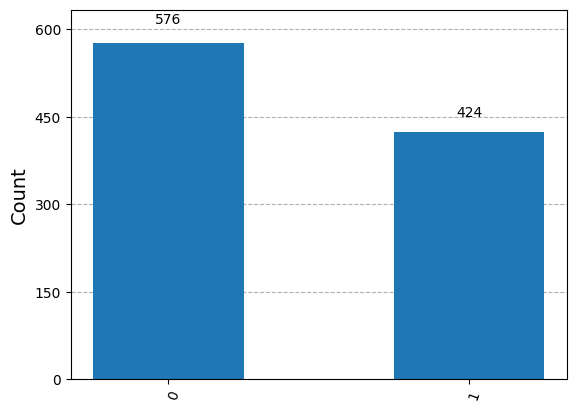

In [41]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

In [42]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(T.draw("latex"))

<IPython.core.display.Latex object>

In [43]:
v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw("latex"))

<IPython.core.display.Latex object>

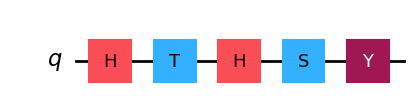

In [44]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output="mpl"))

In [46]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

In [47]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

In [1]:
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))

NameError: name 'v' is not defined

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer  # Use qiskit_aer instead of qiskit.providers.aer

# Create a quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
print(qc)
# Select a backend
backend = Aer.get_backend("aer_simulator")  # "qasm_simulator" has been replaced

# Transpile the circuit for the backend
optimized_qc = transpile(qc, backend)

# Display the transpiled circuit
print(optimized_qc)


     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


In [2]:
import qiskit
print(qiskit.__version__)

1.3.1


In [3]:
import qiskit_aer
print(qiskit_aer.__version__)

0.14.1


In [4]:
# check_qiskit_versions.py
import qiskit
import qiskit_aer
import numpy as np

print(f"Qiskit Version: {qiskit.__version__}")
print(f"Qiskit Aer Version: {qiskit_aer.__version__}")

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

try:
    # 1. Simple Circuit
    qc = QuantumCircuit(2, 2, name="SimpleTest")
    qc.h(0)
    qc.cx(0, 1)
    qc.measure([0, 1], [0, 1])
    print("\nSimple Circuit Created:")
    print(qc.draw(output='text'))

    # 2. Get AerSimulator Backend
    backend = AerSimulator()
    print(f"\nGot Backend: {backend.name}")
    print(f"Backend Target available: {'Yes' if backend.target else 'No'}")
    if backend.target:
        print(f"Backend Target basis gates: {backend.target.basis_gates}")

    # 3. Basic Transpile using Backend Target
    print("\nAttempting transpile(circuit, backend=backend)...")
    transpiled_qc_backend = transpile(qc, backend=backend, optimization_level=1)
    print(" -> SUCCESS")
    # print(transpiled_qc_backend.draw(output='text')) # Optional: view transpiled

    # 4. Basic Transpile using explicit Basis Gates
    print("\nAttempting transpile(circuit, basis_gates=...)...")
    basis = ['id', 'rz', 'sx', 'x', 'cx', 'h', 'measure', 'reset', 'barrier']
    transpiled_qc_basis = transpile(qc, basis_gates=basis, optimization_level=1)
    print(" -> SUCCESS")
    # print(transpiled_qc_basis.draw(output='text')) # Optional: view transpiled

    # 5. Run the basis-transpiled circuit
    print(f"\nRunning basis-transpiled circuit on {backend.name}...")
    job = backend.run(transpiled_qc_basis, shots=100)
    result = job.result()
    counts = result.get_counts()
    print(f" -> SUCCESS. Counts: {counts}")

    print("\n--- Version Check Complete: Basic transpilation and execution seem OK. ---")

except Exception as e:
    print(f"\n--- ERROR during version check ---")
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()
    print("--- This suggests a potential core incompatibility or installation issue. ---")

Qiskit Version: 1.3.1
Qiskit Aer Version: 0.14.1

Simple Circuit Created:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Got Backend: aer_simulator
Backend Target available: Yes

--- ERROR during version check ---
An error occurred: 'Target' object has no attribute 'basis_gates'
--- This suggests a potential core incompatibility or installation issue. ---


Traceback (most recent call last):
  File "C:\Users\adele\AppData\Local\Temp\ipykernel_31204\3047130972.py", line 26, in <module>
    print(f"Backend Target basis gates: {backend.target.basis_gates}")
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'Target' object has no attribute 'basis_gates'
